# Sentiment Analysis Model

### 1. Let's start with loading the Yelp Review Dataset and adjusting the chunk

In [3]:
# Import necessary libraries
import pandas as pd
import json
# Read JSON in chunks
chunk_size = 1000000   # Adjust the chunk size according to your system's memory
chunks = []
for chunk in pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize=chunk_size):
    chunks.append(chunk)
    break  # Remove this line to read the entire file in chunks
# Combine chunks into a DataFrame if needed
df = pd.concat(chunks, axis=0)
print(df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  int64         
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 68.7+ MB


In [5]:
df.columns.unique()

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

### 2. It is time to get rid of unnecessary columns

In [6]:
df = df.drop(['review_id', 'user_id', 'business_id','funny','cool','date'], axis=1)

### 3. Function for labeling the sentiments and applying them

In [7]:
def label_sentiment(rating):
    if rating >= 4:
        return 2
    elif rating <= 2:
        return 0
    else:
        return 1

In [8]:
df['sentiment'] = df['stars'].apply(label_sentiment)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   stars      1000000 non-null  int64 
 1   useful     1000000 non-null  int64 
 2   text       1000000 non-null  object
 3   sentiment  1000000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 30.5+ MB


In [10]:
df['stars'].value_counts().sum()

1000000

In [11]:
len(df['text'].value_counts())

998357

In [12]:
len(df['sentiment'].value_counts())

3

### 4. Picking up the useful reviews

In [13]:
df = df[df['useful'] == 1].reset_index(drop=True)

In [14]:
df['stars'].value_counts().sum()

217272

In [15]:
len(df['text'].value_counts())

217168

In [16]:
len(df['sentiment'].value_counts())

3

In [17]:
sentiment_list = df['sentiment'].tolist()
 
print(sentiment_list)

[2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 

In [18]:
df['stars'].value_counts()

5    96614
4    49121
1    30505
3    23130
2    17902
Name: stars, dtype: int64

In [19]:
df.shape

(217272, 4)

In [20]:
df['sentiment'].value_counts()

2    145735
0     48407
1     23130
Name: sentiment, dtype: int64

### 5. Fixing and equalizing the sample sizes

In [21]:
import random

star_counts = df['stars'].value_counts()
desired_count = 17000
sampled_dfs = []


for star_rating in star_counts.index:
    subset_df = df[df['stars'] == star_rating]
    sampled_df = subset_df.sample(n=desired_count, random_state=42) 
    sampled_dfs.append(sampled_df)
    
df_equalized = pd.concat(sampled_dfs)


In [22]:
import random

sentiment_counts = df['sentiment'].value_counts()
desired_count_2 = 17000
sampled_dfs_2 = []


for sentiment_rating in sentiment_counts.index:
    subset_df_2 = df[df['sentiment'] == sentiment_rating]
    sampled_df_2 = subset_df_2.sample(n=desired_count_2, random_state=42) 
    sampled_dfs_2.append(sampled_df_2)
    
df_equalized = pd.concat(sampled_dfs_2)


In [23]:
df_equalized['stars'].value_counts()

3    17000
5    11244
1    10792
2     6208
4     5756
Name: stars, dtype: int64

In [24]:
df = df_equalized

In [25]:
df.isnull().sum()

stars        0
useful       0
text         0
sentiment    0
dtype: int64

### 6. Processing data - Tokenization

##### Tokenization is a fundamental step in Natural Language Processing (NLP) that influences the performance of high-level tasks such as sentiment analysis, language translation, and topic extraction. It is the process of breaking down text into smaller units, or tokens, such as words or phrases.

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    
    # Remove stop words and non-alphanumeric characters
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    
    # Stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    return ' '.join(stemmed_words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Serhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Serhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51000 entries, 66337 to 101642
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stars         51000 non-null  int64 
 1   useful        51000 non-null  int64 
 2   text          51000 non-null  object
 3   sentiment     51000 non-null  int64 
 4   cleaned_text  51000 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [28]:
df.to_csv('clean_yelp_data.csv')

### 7. Splitting the data to test

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

### 8. Vectorizing

##### Vectorization is the process of converting words into numbers is called Vectorization, It is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which I will use to find word predictions, similarities etc.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### 9. Grid Searches and Classification Reports

##### With GridSearch I will find the optimal numbers for my Classifiers and Classification Reports will show the accuracy of the model - one of the most exciting steps!

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [5, 10, 20, 30]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_tfidf, y_train)


print("Best n_estimators for Random Forest:", grid_search.best_params_['n_estimators'])
print("Best max_depth for Random Forest:", grid_search.best_params_['max_depth'])
print("Best accuracy for Random Forest:", grid_search.best_score_)


Best n_estimators for Random Forest: 150
Best max_depth for Random Forest: 30
Best accuracy for Random Forest: 0.6992647058823529


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Random Forest', RandomForestClassifier(n_estimators=150, max_depth=30))])


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      3471
           1       0.62      0.58      0.60      3332
           2       0.72      0.79      0.75      3397

    accuracy                           0.70     10200
   macro avg       0.70      0.70      0.70     10200
weighted avg       0.70      0.70      0.70     10200



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

print("Best K for KNN:", grid_search.best_params_['n_neighbors'])
print("Best accuracy for KNN:", grid_search.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors = 20))         
])


clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)



print(classification_report(y_test, y_pred))

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB


param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}


nb = MultinomialNB()


grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_tfidf, y_train)


print("Best alpha for Multinomial NB:", grid_search.best_params_['alpha'])
print("Best accuracy for Multinomial NB:", grid_search.best_score_)


Best alpha for Multinomial NB: 0.5
Best accuracy for Multinomial NB: 0.6961274509803921


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB(alpha=5))         
])


clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3471
           1       0.54      0.80      0.65      3332
           2       0.91      0.55      0.69      3397

    accuracy                           0.68     10200
   macro avg       0.74      0.68      0.69     10200
weighted avg       0.74      0.68      0.69     10200



### 10. Et Voila! We are ready!

The results proved to be much as expected. For opinionated texts, there is usually a 70% agreement between human raters. Thus, my model, which have accuracies around and above 70%, provide a very strong model for sentiment analysis. 


References: 

Queppelin Tech, NLP Report 
https://bit.ly/text_sentiment_analysis_based_on_NLP_works_for_businesses

Standard University, Jason Jang
https://cs229.stanford.edu/proj2011/Jong-%20PredictingRatingwithSentimentAnalysis.pdf#:~:text=The%20results%20proved%20to%20be%20much%20better%20than,provide%20a%20very%20strong%20model%20for%20sentiment%20analysis.

In [57]:
X_test

165709    wee book inn great altern book store sell new ...
4053      shop kingsway sinc kid chang lot sinc addit 80...
120745    sooooo cute realli alon give place 5 star love...
187909    quirki littl place decent food good servic tho...
134500    yesterday pm wait 30 minut order one thing two...
                                ...                        
163763    let say fan anyth ferguson resid support neigh...
127355    order grubhub driver call say outsid knew wron...
172628    okay limit review admittedli stop get mint cho...
40957     two thing like locat friendli servic big diner...
13141     nice bar catch friend qualiti beer beer asid p...
Name: cleaned_text, Length: 10200, dtype: object

## LET'S TRY THE MODEL:

0 : Negative Review


1 : Neutral Review


2 : Positive Review

#### TEST1:

In [33]:
new_reviews = ["this restaurant is amazing!", "the service was terrible.", "average experience."]


preprocessed_reviews = [preprocess_text(text) for text in new_reviews]
pd.Series(preprocessed_reviews)

0      restaur amaz
1    servic terribl
2     averag experi
dtype: object

In [34]:
predicted_sentiments = clf.predict(pd.Series(preprocessed_reviews))

In [35]:
print(predicted_sentiments)

[2 0 1]


#### TEST2:

In [36]:
newest_reviews = ["horrible service, never come back", "best bar in town", "it was alright but not recommend"]

preprocessed_reviews_2 = [preprocess_text(text) for text in newest_reviews]
pd.Series(preprocessed_reviews_2)

0    horribl servic never come back
1                     best bar town
2                 alright recommend
dtype: object

In [37]:
predicted_sentiments_2 = clf.predict(pd.Series(preprocessed_reviews_2))
print(predicted_sentiments_2)

[0 2 1]


## How about using this model on Amazon E-Commerce - product dataset? And then from the Vectrorizing step, using other way of similarity usage for product recommendation? Let's do it!

# Product Recommendation

### 11. Loading the new dataset

In [43]:
new_data = pd.read_csv('amazon_co-ecommerce_sample.csv')

print(new_data.head())

                            uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer   price  \
0                              Hornby 2014 Catalogue       Hornby   £3.42   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys  £16.99   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   £9.99   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby  £39.99   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby  £32.19   

  number_available_in_stock number_of_reviews  number_of_answered_questions  \
0                     5 new                15                           1.0   
1                       NaN                 2                           1.0   
2                     2 new                17                    

### 12. Preprocess the data

In [44]:
new_data.isnull().sum()


def lower_case_column_names(columns):
    shopping_data.columns = [i.lower() for i in shopping_data.columns]
    return df

lower_case_column_names(new_data)

new_data.columns = new_data.columns.str.replace(' ', '_')

required_columns = ['product_name', 'description', 'customer_reviews', 'average_review_rating']
new_data = new_data[required_columns]

new_data.head()

,product_name,description,customer_reviews,average_review_rating
0,Hornby 2014 Catalogue,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,4.9 out of 5 stars
1,FunkyBuys® Large Christmas Holiday Express Fes...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,4.5 out of 5 stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,3.9 out of 5 stars
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,I love it // 5.0 // 22 July 2013 // By\n \n...,5.0 out of 5 stars
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Product Description Hornby RailRoad 0-4-0 Gild...,Birthday present // 5.0 // 14 April 2014 // By...,4.7 out of 5 stars


### 13. Checking the value types and applying my sentiment analysis model on the new data's customer reviews

In [46]:
def analyze_sentiment(text):
    # Checking if the value is not a float (text or string)
    if not isinstance(text, float):
        preprocessed_text = preprocess_text(text)
        sentiment = clf.predict(pd.Series([preprocessed_text]))
        return sentiment[0]
    else:
        # Handling cases where the value is not a string (NaN or floats)
        return None


new_data['sentiment_score'] = new_data['customer_reviews'].apply(analyze_sentiment)

### 14. Creating a TF-IDF vectorizer for product descriptions, fitting and transforming the product description text data. And there is something new here: Calculating cosine similarity between product descriptions

###### Cosine similarity is widely used in data analysis and data science, particularly in the field of natural language processing. We often use cosine similarity in document retrieval systems where our goal is to find similar documents from a database.

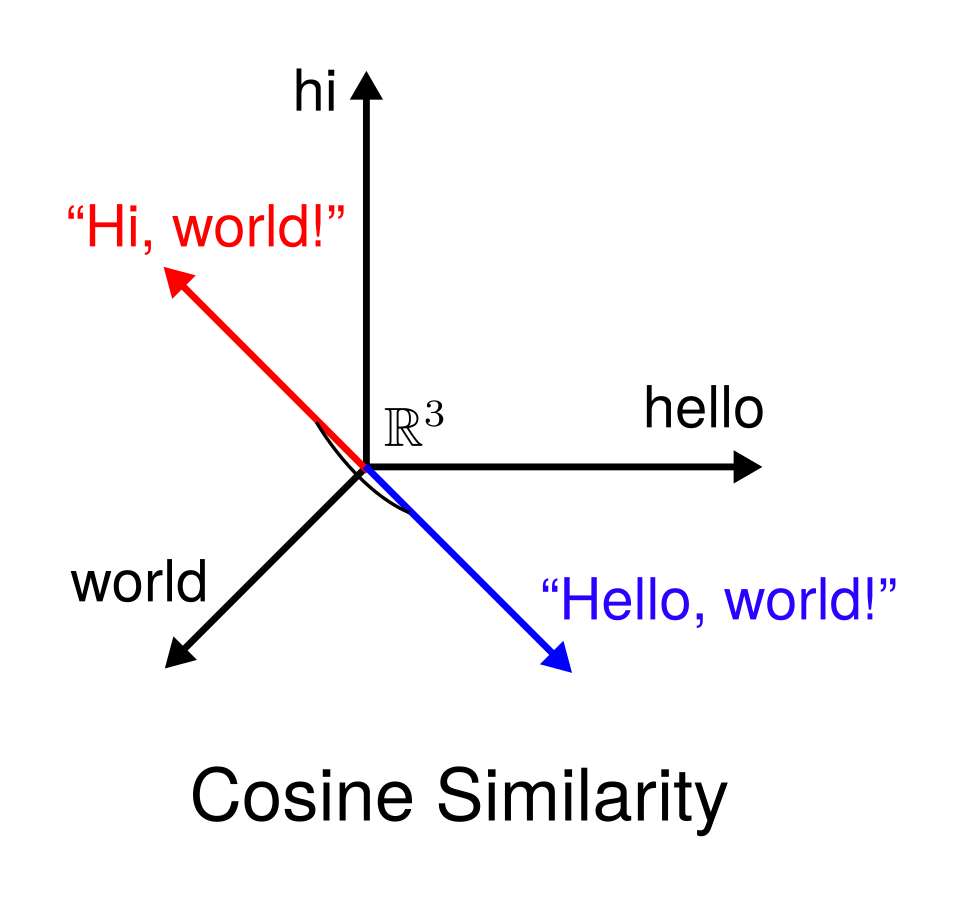

In [54]:
from IPython.display import Image
Image(filename='cosine sim2.png')

In [49]:
from sklearn.metrics.pairwise import linear_kernel

tfidf_vectorizer = TfidfVectorizer()
new_data['description'] = new_data['description'].fillna('')
tfidf_matrix = tfidf_vectorizer.fit_transform(new_data['description'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### 15. And this is where the magic happens: Using new knowledge on this function to get recommendations for a given product

##### Cosine similarity measures the similarity between products, and sim scores help rank them. The function uses these scores to identify and suggest products that are most similar to the one provided, enhancing the user's shopping or content discovery experience.

In [50]:
def get_recommendations(product_name, cosine_sim=cosine_sim):
    idx = new_data[new_data['product_name'] == product_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  #top 10 similar products
    return new_data['product_name'].iloc[[x[0] for x in sim_scores]]

### Et Voila! Ready to recommend your future favorite products:

In [52]:
recommended_products = get_recommendations('Preiser 30414 Horse Drawn Liquid Manure Wagon')
print(recommended_products)

21     Preiser 30414 Horse Drawn Liquid Manure Wagon
24            Roco 64723 OBB Railjet Economy Coach V
51           Piko 53366 KSStEB 1st/2nd Class Coach I
61              Piko 57013 myTrain Diesel Locomotive
76                                        Piko 59497
108              Preiser 30411 Horse Drawn Box Wagon
114           Roco 64722 OBB Railjet Economy Coach V
138       Jouef HJ4058 SNCF Type 36 Baggage Coach IV
145         Preiser 30468 Horse Drawn Open Farm Cart
180         Roco 44002 RC44002 HO DB 8 WAGON SET III
Name: product_name, dtype: object
